<a href="https://www.kaggle.com/code/dayyak/global-co2-emission?scriptVersionId=175278752" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

Without a doubt, global development and economic progress have significantly enhanced human life by offering easier access to services and products worldwide. The more advanced a country becomes, the more readily available services are, leading to a higher quality of life. This progress is the outcome of development and economic growth. However, on the flip side, this growth and development come at the cost of increased energy consumption. The escalating energy consumption negatively impacts the environment by generating carbon dioxide, commonly known as CO2 emissions. It's imperative for nations worldwide to address this issue. Numerous environmental conferences have been convened globally to deliberate on this matter. Efforts must be intensified to mitigate the adverse effects of this problem, which pose a threat to both the environment and humanity.

# Data Exploring

In [1]:
import numpy as np 
import seaborn as sns
import pandas as pd 
import plotly.express as px
import geopandas as gpd
import warnings 
import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) 

warnings.filterwarnings('ignore')

co2_emission_df = pd.read_csv('/kaggle/input/global-fossil-co2-emissions-by-country-2002-2022/GCB2022v27_MtCO2_flat.csv')
iso_country_codes_df = pd.read_csv('/kaggle/input/iso-country-codes-global/wikipedia-iso-country-codes.csv')
co2_emission_df.shape

(63104, 11)

In [2]:
co2_emission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


The types of columns seem fine as they are and don't need to be changed. However, I'm going to rename the second column to "Code" instead of "ISO 3166-1 alpha-3" to make it easier to work with.

# Data Processing and Cleaning

In [3]:
co2_emission_df.rename(columns={'ISO 3166-1 alpha-3':'Country_Code'}, inplace=True)
co2_emission_df.head()

,Country,Country_Code,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Exclude records that have zero Total emission 
co2_emission_df = co2_emission_df[co2_emission_df['Total'] > 0]

In [5]:
# Drop row with Null country code
index_list = co2_emission_df[co2_emission_df['Country_Code'].isnull()].index
co2_emission_df.drop(index_list, inplace=True)

In [6]:
co2_emission_df.isnull().sum()

Country             0
Country_Code        0
Year                0
Total               0
Coal               72
Oil               105
Gas               204
Cement           4215
Flaring           272
Other           19993
Per Capita       4430
dtype: int64

In [7]:
# Check null values
co2_emission_df = co2_emission_df.fillna(0)
co2_emission_df.isnull().sum()

Country         0
Country_Code    0
Year            0
Total           0
Coal            0
Oil             0
Gas             0
Cement          0
Flaring         0
Other           0
Per Capita      0
dtype: int64

In [8]:
# Check for any duplicate rows in the dataframe 
duplicate_rows = co2_emission_df[co2_emission_df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Country, Country_Code, Year, Total, Coal, Oil, Gas, Cement, Flaring, Other, Per Capita]
Index: []


The data is now devoid of any null values.

Next, I'll examine the countries and their associated country codes. I've noticed entries like 'Global' that aren't valid countries, so I'll correct those. Additionally, I'll verify the accuracy of country names and codes, possibly by comparing them with another dataset called "CountryContinent" taken from (ISO Country Codes - Global by ANDRADA) URL: https://www.kaggle.com/datasets/andradaolteanu/iso-country-codes-global

In [9]:
# Combining the main dataframe with the ISO Country dataframe using 
# the country code as the matching criteria
merged_df = pd.merge(co2_emission_df[['Country','Country_Code']],iso_country_codes_df[['English short name lower case','Alpha-3 code']],left_on='Country_Code', right_on='Alpha-3 code')

# Comparing the country name columns
merged_df[merged_df['Country'] != merged_df['English short name lower case']].drop_duplicates()

,Country,Country_Code,English short name lower case,Alpha-3 code
2666,British Virgin Islands,VGB,"Virgin Islands, British",VGB
4014,Congo,COG,Congo (Kinshasa),COG
4707,North Korea,PRK,"Korea, Democratic People's Republic of",PRK
4820,Democratic Republic of the Congo,COD,Congo (Brazzaville),COD
5960,Faeroe Islands,FRO,Faroe Islands,FRO
6032,Micronesia (Federated States of),FSM,"Micronesia, Federated States of",FSM
8046,Hong Kong,HKG,"Hong Kong S.A.R., China",HKG
10098,Laos,LAO,Lao People's Democratic Republic,LAO
10529,Libya,LBY,Libyan Arab Jamahiriya,LBY
10948,North Macedonia,MKD,"Macedonia, the former Yugoslav Republic of",MKD


I have observed some spelling errors such as "Faeroe Islands" and "Viet Nam". Additionally, there are instances where countries have the same country code and name, like "USA". To address these issues, the next step is to rectify them by copying the country names from the iso-country-code dataset to the main dataframe.

In [10]:
co2_emission_copy = co2_emission_df.copy()

co2_emission_copy['Country'] = co2_emission_df['Country_Code'].map(iso_country_codes_df.set_index('Alpha-3 code')['English short name lower case'])

co2_emission_copy['Country'].fillna(co2_emission_df['Country'], inplace=True)

co2_emission_df = co2_emission_copy.copy()

co2_emission_df['Country'] = co2_emission_df['Country'].replace({
    "United States": "United States of America"})

Let's now identify the countries that do not exist in the iso_country_codes_df dataset.

In [11]:
co2_emission_df[~co2_emission_df['Country_Code'].isin(iso_country_codes_df['Alpha-3 code'])]['Country_Code'].drop_duplicates()

6704     BES
13504    CUW
18968    PCZ
29090    KSV
46168    SSD
48592    SXM
62760    XIT
62832    WLD
Name: Country_Code, dtype: object

I've identified some country codes that don't correspond to any actual country (such as 'Global', 'Panama Canal Zone', 'International Transport', 'Bonaire, Saint Eustatius, and Saba'). However, I'll keep certain countries in the dataframe even if they're not included in the iso-country-code dataset, such as Kosovo, South Sudan, and Sint Maarten (Dutch part).

To ensure clarity and accuracy in the analysis, I'll remove the rows containing values that don't belong to actual countries to avoid any misleading information.

In [12]:
co2_emission_df = co2_emission_df[~co2_emission_df['Country_Code'].isin(['BES', 'CUW', 'PCZ', 'XIT', 'WLD', 'SXM'])]

To summarize, I've excluded records that have total emissions equal to zero, as they don't provide any meaningful information. I have filled the null values with zeros. Additionally, I've aligned country codes with ISO standard country codes and updated the country names accordingly, fixing any spelling errors in the process. Moreover, I've excluded rows containing country names that refer to regions or other concepts rather than individual countries, to maintain focus on individual countries for the analysis.

# Data Analysis and Visualization

**What is the relationship between total CO2 emissions and different types of energy sources?**

<Axes: >

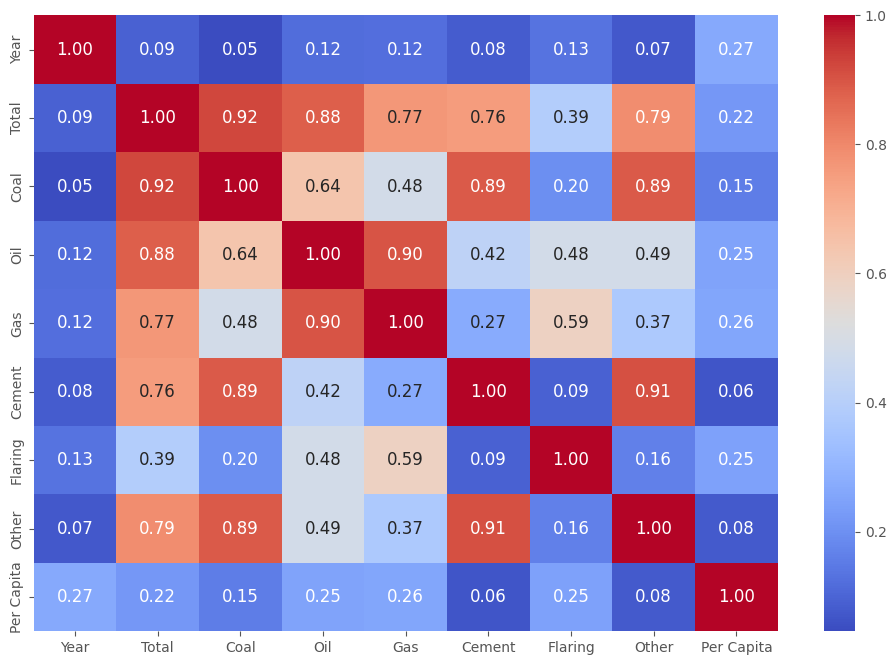

In [13]:
numeric_df = co2_emission_df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 12}, xticklabels=1, yticklabels=1)

The correlation plot reveals that Coal and Total emissions exhibit the highest positive correlation, with a coefficient of 0.92, followed by Oil at 0.88. Gas, Cement, and Other energy sources show a moderate correlation, ranging from 0.76 to 0.79. However, Flaring energy source displays the lowest correlation, with a value of 0.39, indicating a weak correlation. **This leads us to another question:what was the initial energy source responsible for emissions, and how was it impacted by subsequent energy sources that emerged over time?**

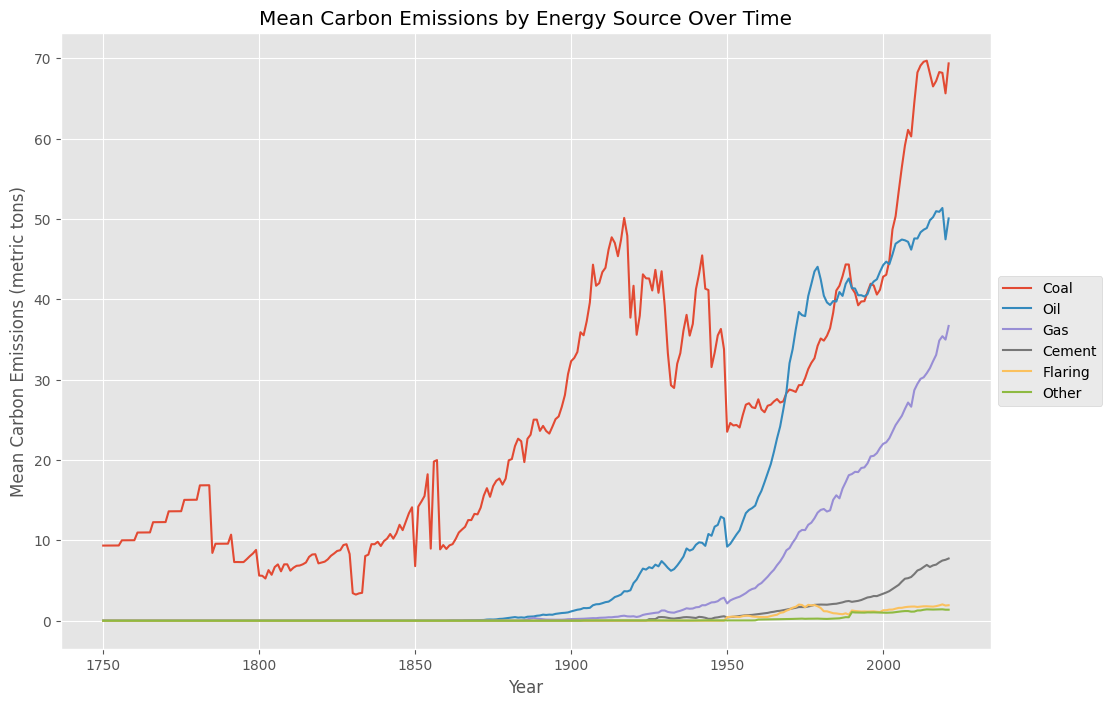

In [14]:
mean_emissions_by_year = co2_emission_df.groupby('Year')[['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']].mean().reset_index()

mean_emissions_by_year_melted = mean_emissions_by_year.melt(id_vars='Year', var_name='Energy Source', value_name='Mean Carbon Emissions')

sns.lineplot(data=mean_emissions_by_year_melted, x='Year', y='Mean Carbon Emissions', hue='Energy Source')
plt.xlabel('Year')
plt.ylabel('Mean Carbon Emissions (metric tons)')
plt.title('Mean Carbon Emissions by Energy Source Over Time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid(True)
plt.show()

From the plot above, we observe that Coal was the first energy source to cause CO2 emissions, beginning in 1750. Oil followed suit in 1875, with Gas starting in 1910, followed by other energy sources. What's surprising is that the dominance of the first energy source persists over time, with subsequent sources maintaining their positions relative to each other. This suggests that older energy sources continue to have higher emissions, followed by the newer ones in succession. However, another plausible explanation is that the world's reliance on these energy sources has remained consistent over time, with Coal being the most consumed, followed by Oil and Gas. This interpretation suggests that we may need additional datasets detailing energy consumption over time to fully understand these trends.

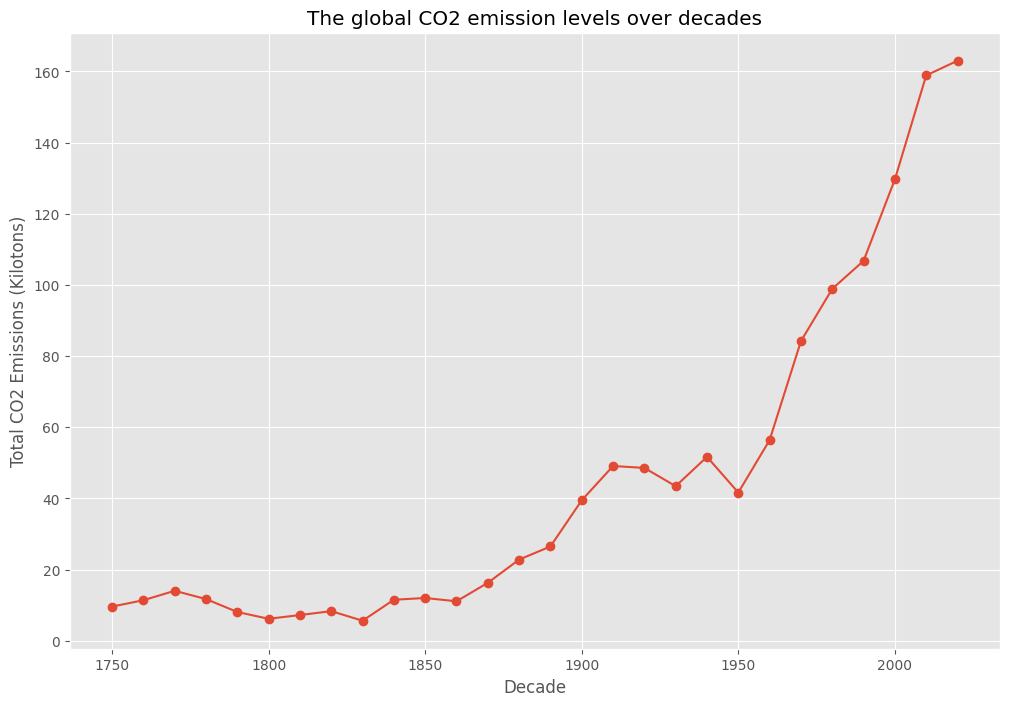

In [15]:
co2_emission_df['Decade'] = (co2_emission_df['Year'] // 10) * 10
df_decades = co2_emission_df[['Decade', 'Total']].groupby('Decade').agg('mean').reset_index()

plt.plot(df_decades['Decade'], df_decades['Total'], marker='o')
plt.xlabel('Decade')
plt.ylabel('Total CO2 Emissions (Kilotons)')
plt.title('The global CO2 emission levels over decades')
plt.grid(True)
plt.show()

The plot depicts a fluctuating trend in CO2 emissions between the decades 1750 and 1870, with values remaining below 20 kilotons. However, a noticeable increase in emissions began around 1880 and has continued to the present day.

**What are the top 10 countries in terms of CO2 emissions over time?**

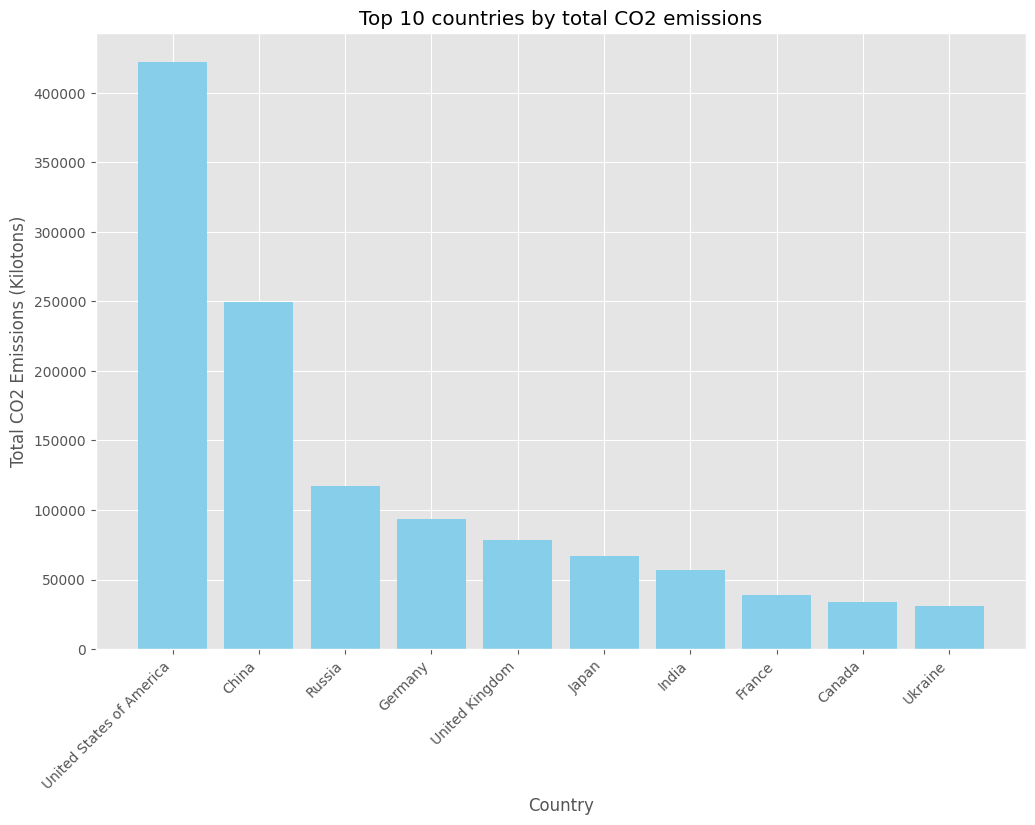

In [16]:
co2_emission_gp = co2_emission_df[['Country', 'Total']].groupby('Country').agg('sum').reset_index().sort_values(by='Total', ascending=False).head(10)

plt.bar(co2_emission_gp['Country'], co2_emission_gp['Total'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions (Kilotons)')
plt.title('Top 10 countries by total CO2 emissions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

The United States leads as the top emitter of total CO2 emissions from 1750 to 2021, contributing approximately 450,000 kilotons. China follows closely behind with around 250,000 kilotons, roughly double the emissions of Russia, which ranks third at approximately 120,000 kilotons.

Now, let's explore which energy source (Coal, Oil and Gas) has contributed the most to CO2 emissions for each individual country over time. For instance, let's consider the top three countries highlighted in the plot above: the United States, China, and Russia.

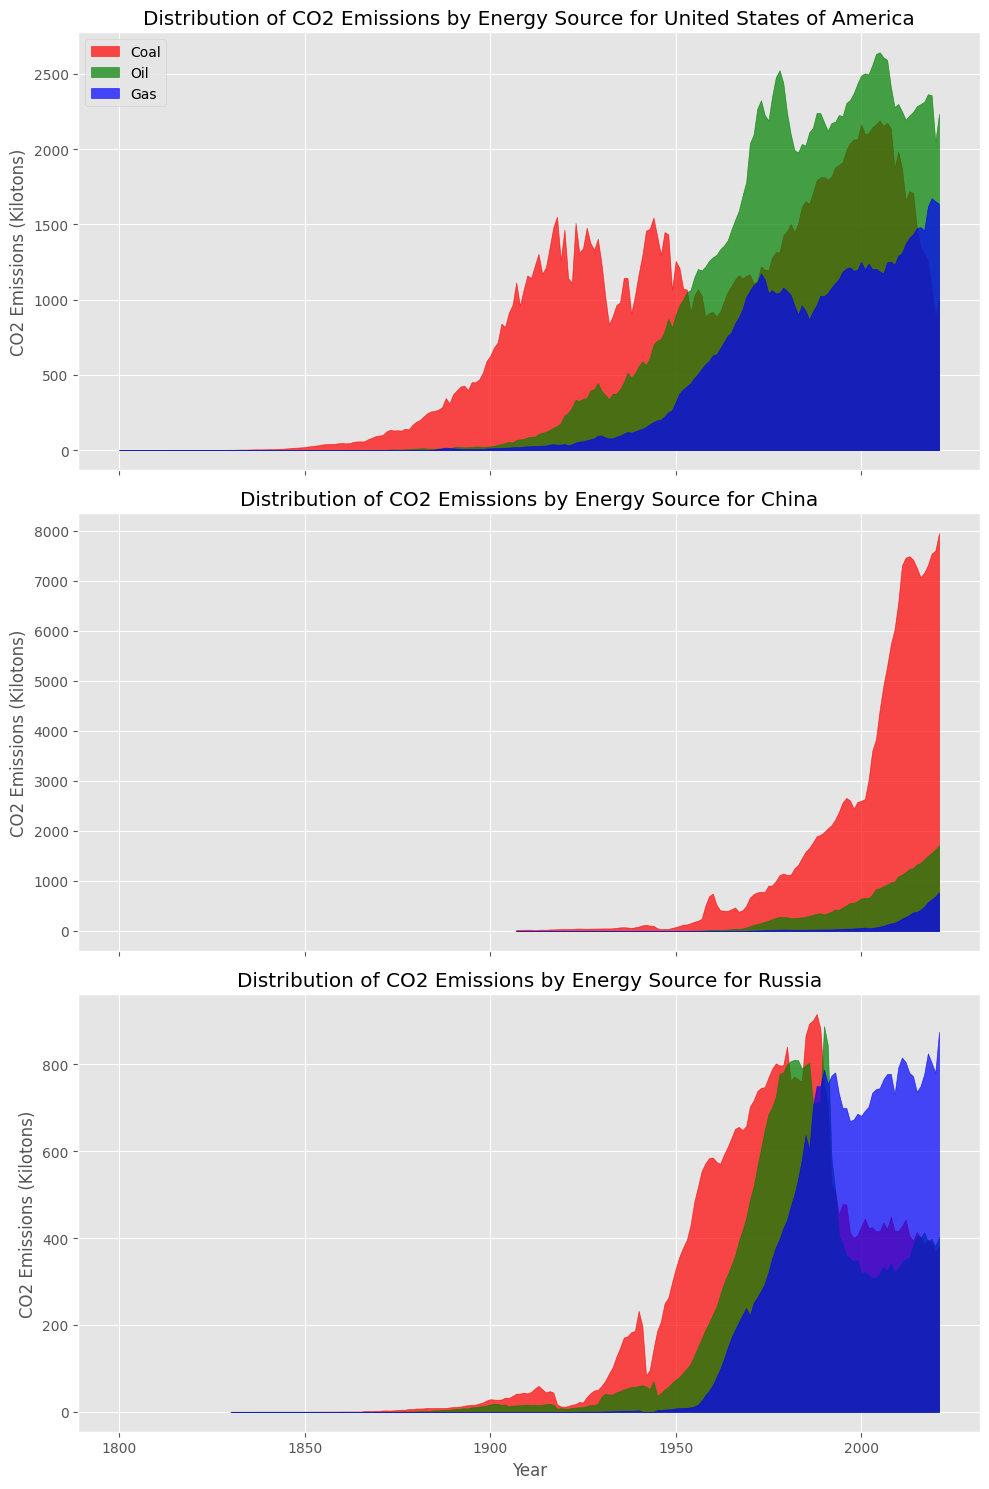

In [17]:
countries_of_interest = ['United States of America', 'China', 'Russia']

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10, 15), sharex=True)

for country, ax in zip(countries_of_interest, [ax1, ax2, ax3]):
    country_df = co2_emission_df[co2_emission_df['Country'] == country]
 
    ax.fill_between(country_df['Year'], country_df['Coal'], label='Coal', color='r', alpha=0.7)
    ax.fill_between(country_df['Year'], country_df['Oil'], label='Oil', color='g', alpha=0.7)
    ax.fill_between(country_df['Year'], country_df['Gas'], label='Gas', color='b', alpha=0.7)
    
    ax.set_ylabel('CO2 Emissions (Kilotons)')
    ax.set_title(f'Distribution of CO2 Emissions by Energy Source for {country}')
    
    if country == countries_of_interest[0]:
        ax.legend(loc='upper left')

plt.xlabel('Year')
plt.tight_layout()
plt.show()

* United States: Coal emissions were the highest until the 1950s, followed by Oil, which has remained the primary contributor up to 2021. Gas emissions have consistently been the lowest.

* China: Coal emissions have consistently been the highest since the early 1900s and remain so until 2021, followed by Oil. Gas emissions rank the lowest.

* Russia: Coal emissions were the highest until the 1980s, after which Oil took over as the primary contributor, followed by Gas. Interestingly, all energy sources peaked at approximately 850 Kilotons over time."

**Which ten countries have the highest per capita carbon dioxide emissions?**

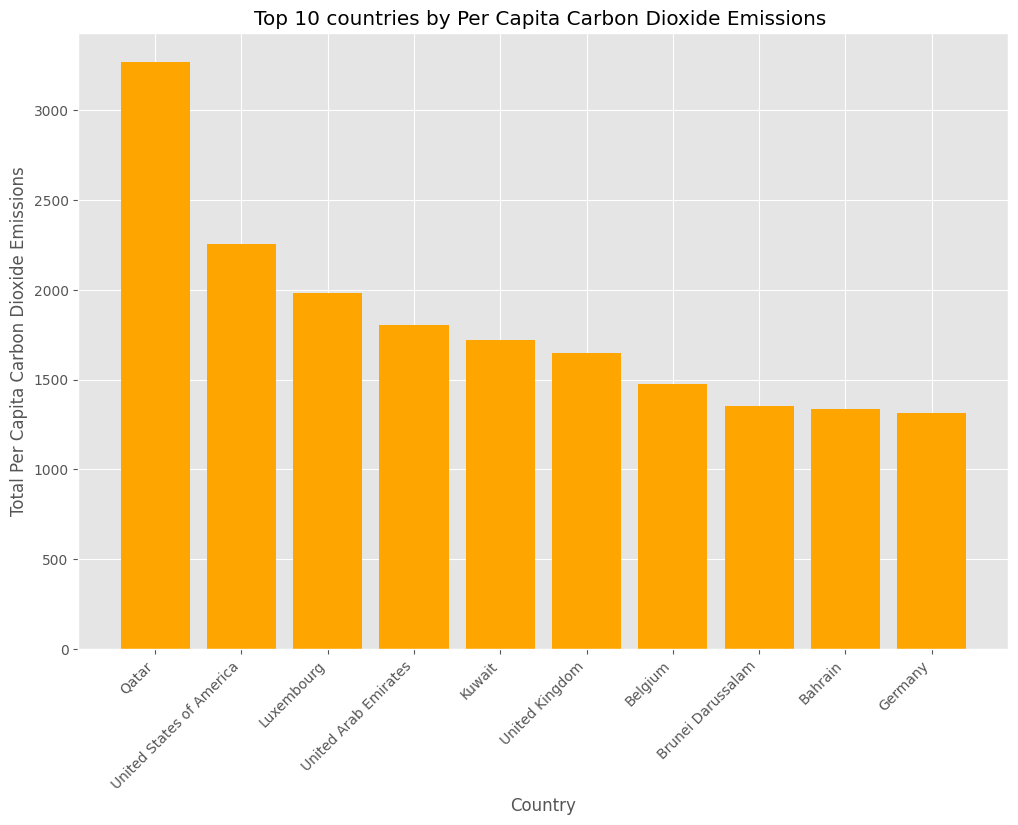

In [18]:
co2_emission_gp = co2_emission_df[['Country', 'Per Capita']].groupby('Country').agg('sum').reset_index().sort_values(by='Per Capita', ascending=False).head(10)

plt.bar(co2_emission_gp['Country'], co2_emission_gp['Per Capita'], color='orange')
plt.xlabel('Country')
plt.ylabel('Total Per Capita Carbon Dioxide Emissions')
plt.title('Top 10 countries by Per Capita Carbon Dioxide Emissions ')
plt.xticks(rotation=45, ha='right')  
plt.grid(True)
plt.show()

The plot reveals some interesting findings. While the USA maintains the highest total CO2 emissions over time, it ranks second in per capita emissions. China and Russia drop out of the top 20 countries in the per capita emissions plot. A surprising observation is that Qatar claims the top spot, despite its population in 2021 being only 2.688 million. Additionally, three other Gulf countries—UAE (9.365 million), Kuwait (4.25 million), and Bahrain (1.463 million)—take positions 4, 5, and 9, respectively, in the per capita emissions ranking.

*Let's analyze the top country for per capita emissions over time.*

In [19]:
table_data = []

co2_emission_filtered = co2_emission_df[['Country', 'Year', 'Per Capita']][(co2_emission_df['Per Capita'] != 0) & (~co2_emission_df['Country'].isna())]

top_country_per_capita_year = co2_emission_filtered.groupby('Year').apply(lambda x: x.loc[x['Per Capita'].idxmax()]).reset_index(drop=True)

grouped_by_country = top_country_per_capita_year.groupby('Country')

for country, group_df in grouped_by_country:
    start_year = None
    prev_year = None

    for index, row in group_df.iterrows():
        if start_year is None or row['Year'] == prev_year + 1:
            if start_year is None:
                start_year = row['Year']
            prev_year = row['Year']
        else:
            table_data.append([country, start_year, prev_year])
            start_year = row['Year']
            prev_year = row['Year']
    
    table_data.append([country, start_year, prev_year])

table_df = pd.DataFrame(table_data, columns=['Country', 'Start Year', 'End Year'])

table_df

,Country,Start Year,End Year
0,Kuwait,1962,1962
1,Luxembourg,1950,1961
2,Luxembourg,1990,1990
3,Qatar,1963,1968
4,Qatar,1970,1973
5,Qatar,1979,1984
6,Qatar,1986,1986
7,Qatar,1988,1989
8,Qatar,1991,2021
9,United Arab Emirates,1969,1969


The United Kingdom held the top position for approximately 82 years, from 1820 to 1902. Following that, the United States took the lead from 1903 to 1949. Luxembourg briefly held the highest position from 1950 to 1961, with the last peak year being 1990. Subsequently, Middle Eastern countries, particularly Gulf nations, emerged as leaders, with Kuwait leading in 1962, followed by Qatar and the UAE from 1963 to 2021. These smaller countries, characterized by relatively small populations, maintained the highest per capita carbon dioxide emissions for over 60 years, from the 1960s until 2021.

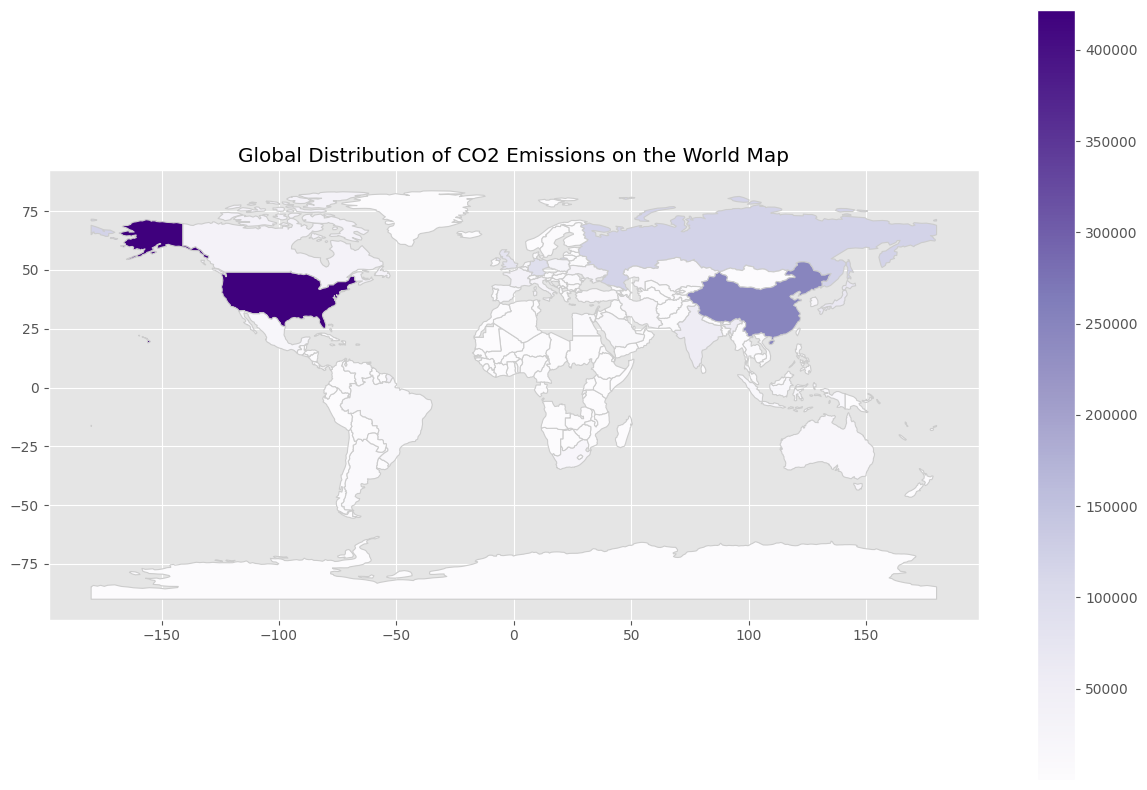

In [20]:
co2_emission_gp = co2_emission_df[['Country', 'Total']].groupby('Country').agg('sum').reset_index().sort_values(by='Total', ascending=False)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(co2_emission_gp, how='left', left_on='name', right_on='Country')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Total', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Global Distribution of CO2 Emissions on the World Map')
plt.show()

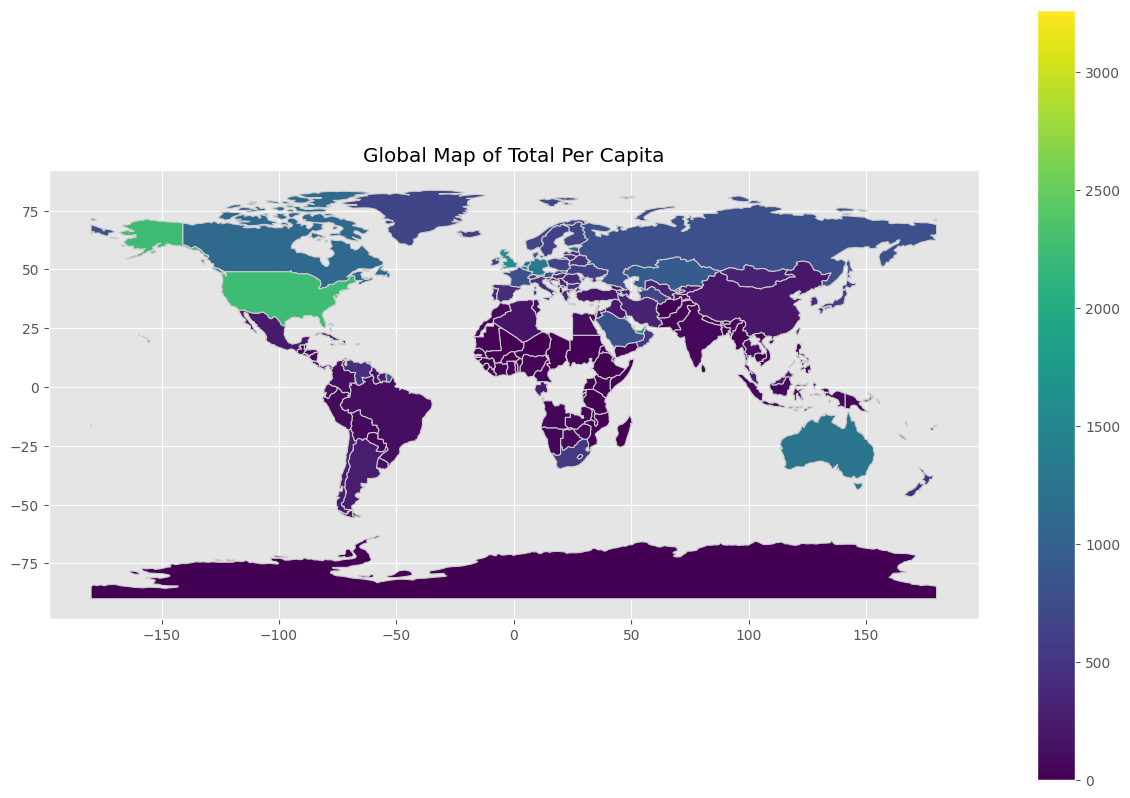

In [21]:
co2_emission_gp = co2_emission_df[['Country', 'Per Capita']].groupby('Country').agg('sum').reset_index().sort_values(by='Per Capita', ascending=False)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(co2_emission_gp, how='left', left_on='name', right_on='Country')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Per Capita', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Global Map of Total Per Capita')
plt.show()

# Summary

Summarizing the analysis, our focus centers on global CO2 emissions trends. Utilizing correlation plots and historical data, we observe coal, oil, and gas as the primary contributors to emissions, with coal historically dominating. This trend demonstrates a significant increase from 1750 to 2021, highlighting the scale of the environmental challenge. Notably, the United States and China emerge as the top CO2 emitters, while Gulf countries like Qatar and the UAE have led per capita emissions since the 1960s. It is vital to prioritize addressing the issue and allocate additional resources towards finding solutions in order to protect and preserve our planet.